In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from LSTMpredictor import load_data, data_window, LSTM

In [5]:
ticker = "SHIB"
data_mode = "eth"
test_ratio = 0.33
sequence_length = 50
leeway = 10
num_epochs = 200

In [6]:
model = torch.load('saved_models/lstm_'+ ticker + '_' + data_mode + '_' + str(num_epochs) + 'saved.pth')
data, train_x, train_y, test_x, test_y, scaler, output_scaler = load_data(ticker, data_mode, test_ratio, sequence_length, leeway)

In [7]:
train_y_pred = model(train_x)
test_y_pred = model(test_x)
# invert predictions
train_y_pred = output_scaler.inverse_transform(train_y_pred.detach().numpy())
train_y = output_scaler.inverse_transform(train_y.detach().numpy())
test_y_pred = output_scaler.inverse_transform(test_y_pred.detach().numpy())
test_y = output_scaler.inverse_transform(test_y.detach().numpy())

In [8]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_y[:,0], train_y_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y[:,0], test_y_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


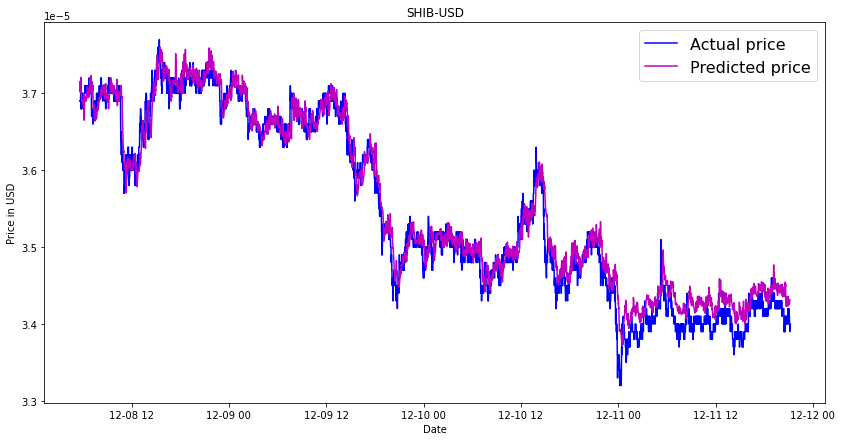

In [9]:
plt.figure(figsize=(14,7))
plt.plot(data["time"][(len(data) - len(test_y)):], test_y, color = 'b')
plt.plot(data["time"][(len(data) - len(test_y)):], test_y_pred, color = 'm')
plt.legend(["Actual price", "Predicted price"], fontsize = 16)
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.title(ticker+"-USD")
plt.show()

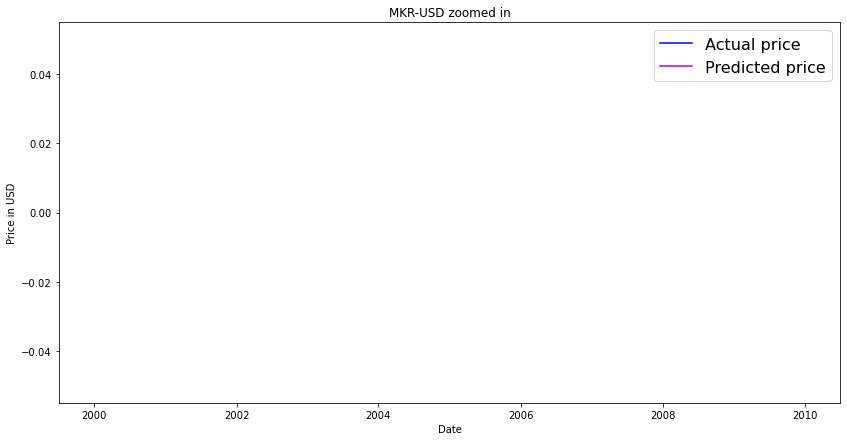

In [32]:
window_len = 500
window_start = 5*window_len
plt.figure(figsize=(14,7))
plt.plot(data["time"][(len(data) - len(test_y) + window_start): (len(data) - len(test_y) + window_start+window_len)], test_y[window_start:(window_start+window_len)], color = 'b')
plt.plot(data["time"][(len(data) - len(test_y) + window_start): (len(data) - len(test_y) + window_start+window_len)], test_y_pred[window_start:(window_start+window_len)], color = 'm')
plt.legend(["Actual price", "Predicted price"], fontsize = 16)
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.title(ticker+"-USD zoomed in")
plt.show()